In [ ]:
import pandas as pd # use for data manipulation and analysis
import numpy as np # use for multi-dimensional array and matrix
import seaborn as sns # use for high-level interface for drawing attractive and informative statistical graphics
import matplotlib.pyplot as plt # It provides an object-oriented API for embedding plots into applications
import plotly.express as px
from sklearn.linear_model import LogisticRegression # algo use to predict good or bad
from sklearn.naive_bayes import MultinomialNB # nlp algo use to predict good or bad
from sklearn.model_selection import train_test_split # spliting the data between feature and target
from sklearn.metrics import classification_report # gives whole report about metrics (e.g, recall,precision,f1_score,c_m)
from sklearn.metrics import confusion_matrix # gives info about actual and predict


In [ ]:
df=pd.read_csv('dataset.csv')

In [ ]:
df.head()

,index,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,-1,1,1,1,-1,-1,-1,-1,-1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,2,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,3,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,4,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,5,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [ ]:
df['Result'].unique()

array([-1,  1])

In [ ]:
df.dtypes

,0
index,int64
having_IPhaving_IP_Address,int64
URLURL_Length,int64
Shortining_Service,int64
having_At_Symbol,int64
double_slash_redirecting,int64
Prefix_Suffix,int64
having_Sub_Domain,int64
SSLfinal_State,int64
Domain_registeration_length,int64


In [ ]:
df.shape

(11055, 32)

In [ ]:
#Unique values for each columns
col=df.columns
for i in col:
     if  i!='index':
        print(i,df[i].unique())

having_IPhaving_IP_Address [-1  1]
URLURL_Length [ 1  0 -1]
Shortining_Service [ 1 -1]
having_At_Symbol [ 1 -1]
double_slash_redirecting [-1  1]
Prefix_Suffix [-1  1]
having_Sub_Domain [-1  0  1]
SSLfinal_State [-1  1  0]
Domain_registeration_length [-1  1]
Favicon [ 1 -1]
port [ 1 -1]
HTTPS_token [-1  1]
Request_URL [ 1 -1]
URL_of_Anchor [-1  0  1]
Links_in_tags [ 1 -1  0]
SFH [-1  1  0]
Submitting_to_email [-1  1]
Abnormal_URL [-1  1]
Redirect [0 1]
on_mouseover [ 1 -1]
RightClick [ 1 -1]
popUpWidnow [ 1 -1]
Iframe [ 1 -1]
age_of_domain [-1  1]
DNSRecord [-1  1]
web_traffic [-1  0  1]
Page_Rank [-1  1]
Google_Index [ 1 -1]
Links_pointing_to_page [ 1  0 -1]
Statistical_report [-1  1]
Result [-1  1]


In [ ]:
col=df.columns
for column in col:
  df[column] = df[column].replace(-1,0)


In [ ]:
#Replacing -1 with 0
df['Result']=df['Result'].replace(-1,0)

In [ ]:
df.shape

(11055, 32)

In [ ]:
# Print correlation with target variable
print(df.corr()['Result'].sort_values())

Domain_registeration_length   -0.225789
Shortining_Service            -0.067966
Abnormal_URL                  -0.060488
HTTPS_token                   -0.039854
double_slash_redirecting      -0.038608
Redirect                      -0.020113
Iframe                        -0.003394
Favicon                       -0.000280
popUpWidnow                    0.000086
index                          0.000978
RightClick                     0.012653
Submitting_to_email            0.018249
port                           0.036419
on_mouseover                   0.041838
having_At_Symbol               0.052948
Links_pointing_to_page         0.056560
URLURL_Length                  0.063125
DNSRecord                      0.075718
Statistical_report             0.079857
having_IPhaving_IP_Address     0.094160
Page_Rank                      0.104645
age_of_domain                  0.121496
Google_Index                   0.128950
Links_in_tags                  0.173651
SFH                            0.206870


<Axes: >

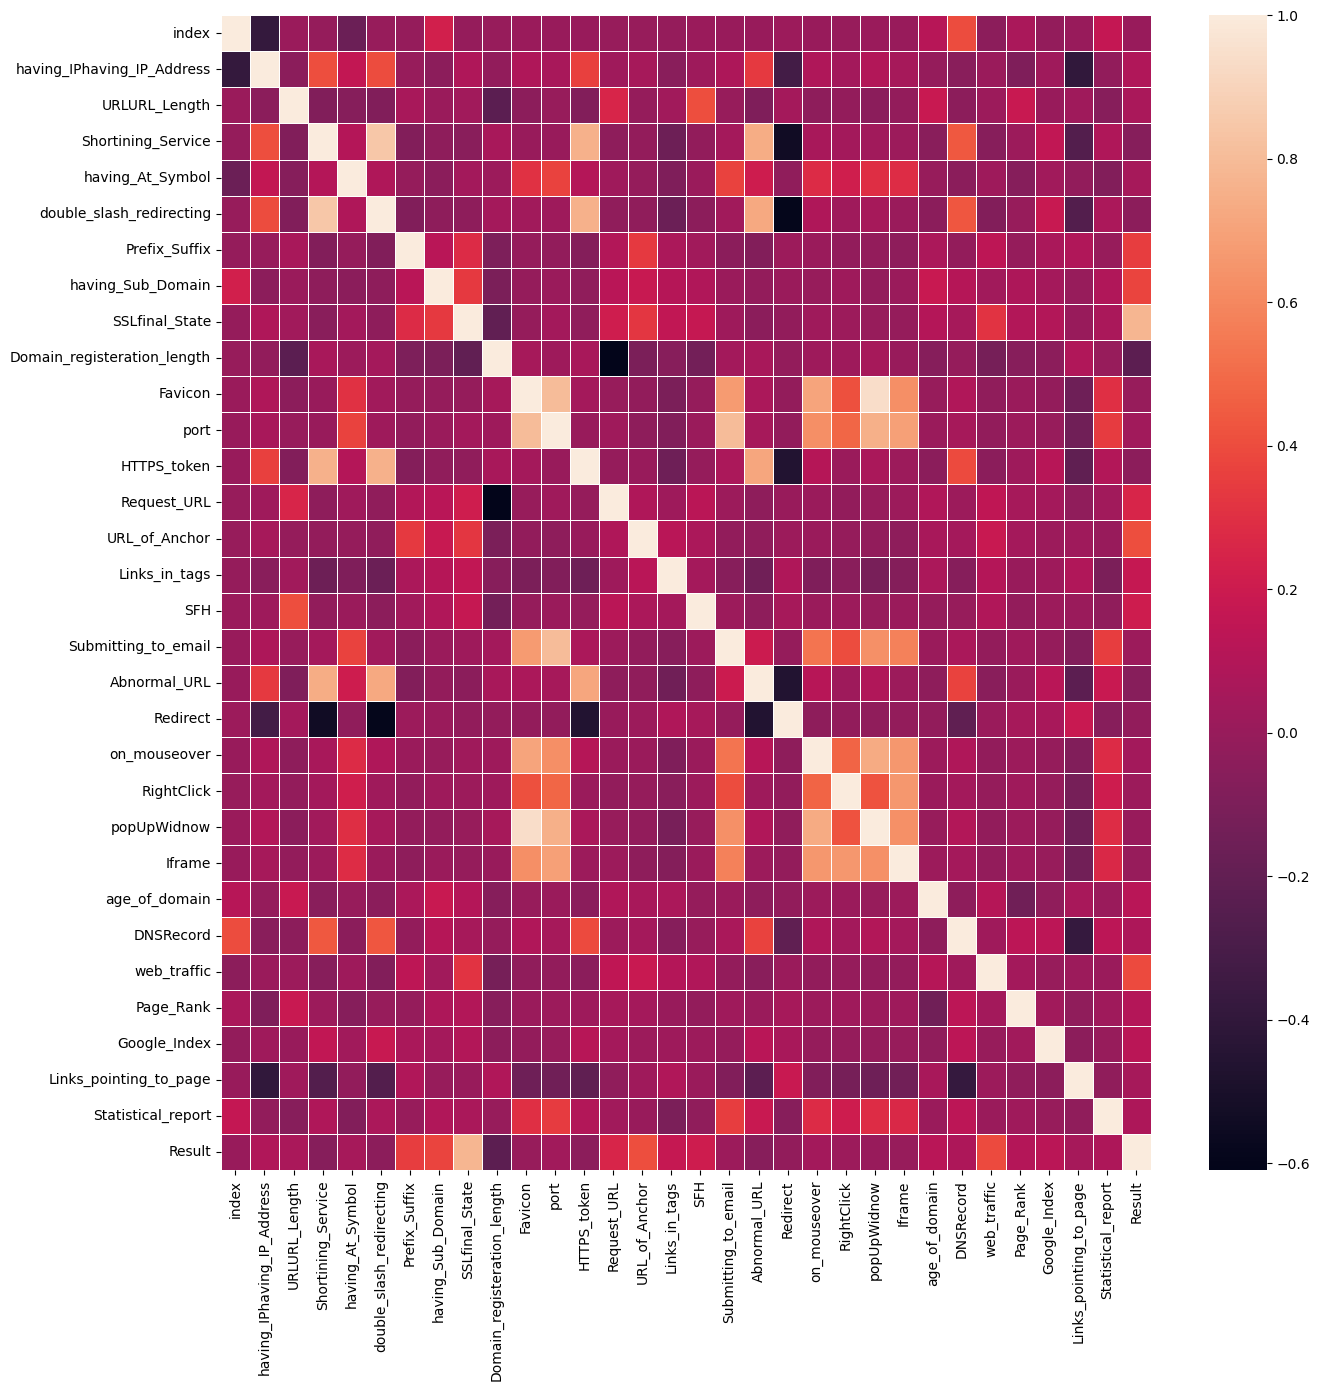

In [ ]:
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), linewidths=.5)

# Model Building

### Spliting into training and testing

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split,cross_val_score

X= df.drop(columns='Result')
Y=df['Result']

train_X,test_X,train_Y,test_Y=train_test_split(X,Y,test_size=0.3,random_state=2)

## 1)Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

lr = LogisticRegression()
lr.fit(train_X, train_Y)
pred = lr.predict(test_X)

# Calculate accuracy
accuracy = accuracy_score(pred, test_Y)
print("Accuracy:", accuracy)

# Generate classification report
report = classification_report(test_Y, pred)
print("Classification Report:\n", report)

# Generate confusion matrix
matrix = confusion_matrix(test_Y, pred)
print("Confusion Matrix:\n", matrix)

Accuracy: 0.894181489297558
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.88      0.88      1460
           1       0.90      0.91      0.91      1857

    accuracy                           0.89      3317
   macro avg       0.89      0.89      0.89      3317
weighted avg       0.89      0.89      0.89      3317

Confusion Matrix:
 [[1282  178]
 [ 173 1684]]


## 2)KNeighbors Classfier

In [ ]:
knn=KNeighborsClassifier(n_neighbors=3)
model= knn.fit(train_X,train_Y)

knn_predict=model.predict(test_X)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

accuracy_score(knn_predict,test_Y)

0.5586373228821224

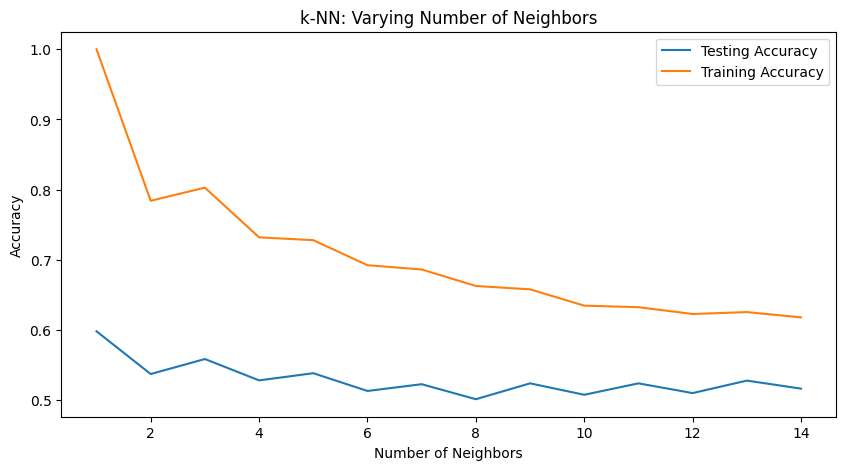

In [ ]:
neighbors = np.arange(1, 15)

train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors= k )

    # Fit the classifier to the training data
    knn.fit(train_X, train_Y)

    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(train_X, train_Y)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(test_X, test_Y)

# Generate plot
plt.figure(figsize=(10,5))
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

## 3)Naive Bayes

In [ ]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

clf = BernoulliNB()
clf.fit(train_X, train_Y)
naive_predict = clf.predict(test_X)

# Calculate accuracy
accuracy = accuracy_score(naive_predict, test_Y)
print("Accuracy:", accuracy)

# Generate classification report
report = classification_report(test_Y, naive_predict)
print("Classification Report:\n", report)

# Generate confusion matrix
matrix = confusion_matrix(test_Y, naive_predict)
print("Confusion Matrix:\n", matrix)

Accuracy: 0.9035272836900814
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.90      0.89      1460
           1       0.92      0.91      0.91      1857

    accuracy                           0.90      3317
   macro avg       0.90      0.90      0.90      3317
weighted avg       0.90      0.90      0.90      3317

Confusion Matrix:
 [[1311  149]
 [ 171 1686]]


## 4)Random Forest


In [ ]:
# Import necessary libraries
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report

# Random Forest with Hyperparameter Tuning
rf = RandomForestClassifier(random_state=42)
# Hyperparameter grid
random_grid = {
    'n_estimators': [int(x) for x in np.linspace(start=200, stop=2000, num=10)],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [int(x) for x in np.linspace(10, 110, num=11)] + [None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# RandomizedSearchCV for finding best parameters
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid, n_iter=100, cv=3, random_state=42, n_jobs=-1)
rf_random.fit(train_X, train_Y)

# Best parameters from RandomizedSearchCV
print("Best Parameters for Random Forest:", rf_random.best_params_)

# Evaluate Random Forest with best parameters
best_rf = rf_random.best_estimator_
rf_pred = best_rf.predict(test_X)
print("Random Forest Accuracy with Best Params:", accuracy_score(rf_pred, test_Y))
print(classification_report(test_Y, rf_pred))

Best Parameters for Random Forest: {'n_estimators': 1600, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 70, 'bootstrap': False}
Random Forest Accuracy with Best Params: 0.9487488694603557
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      1460
           1       0.95      0.95      0.95      1857

    accuracy                           0.95      3317
   macro avg       0.95      0.95      0.95      3317
weighted avg       0.95      0.95      0.95      3317

